## IDEA: TAKE THE FAKE STRIPES AND NOISE DATA [WHICH MIMICS TRACK VS SHOWER] AND BUILD A CLASSIFIER WHICH RESPECTS ROTATIONAL SYMMETRY - THIS CAN BE BUILT UP FROM PERMUTATIONS

## USE SOME INSIGHTS FROM THE CYCLIC ADVANTAGE PAPER?

## Should probably be a convolutional network?

In [489]:
from utils import make_mock_tracks, make_mock_showers,rotate_270,rotate_180,rotate_90

data = make_mock_tracks(1,1,3)

In [490]:
data

array([[0.        , 0.99746633, 0.        , 0.        , 0.93930162,
        0.        , 0.        , 0.215312  , 0.        ]])

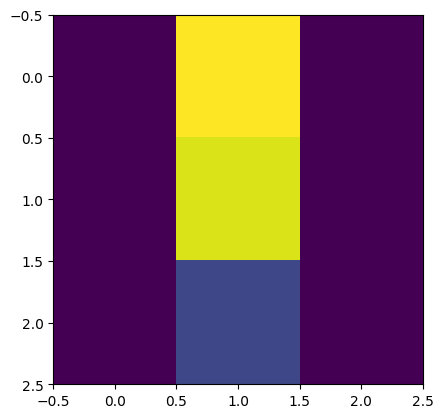

In [491]:
import matplotlib.pyplot as plt

plt.imshow(data[0].reshape(3,3))

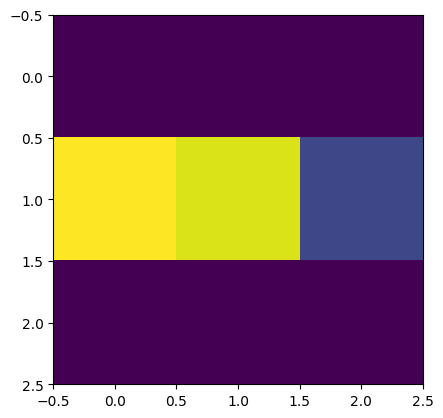

In [492]:
plt.imshow(data[0].reshape(3,3).transpose())

In [493]:
from copy import deepcopy

original_image = data[0].reshape(3,3)


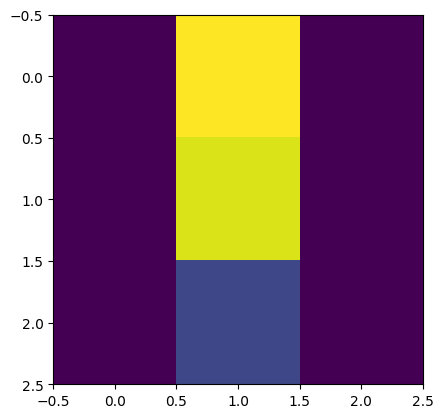

In [494]:
plt.imshow(original_image)

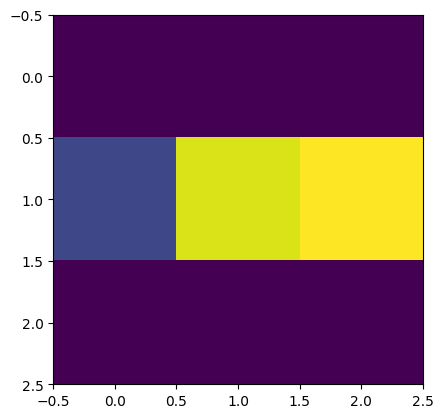

In [495]:
plt.imshow(rotate_90(deepcopy(original_image)))

In [496]:
original_image


array([[0.        , 0.99746633, 0.        ],
       [0.        , 0.93930162, 0.        ],
       [0.        , 0.215312  , 0.        ]])

In [497]:
rotate_90(deepcopy(original_image))

array([[0.        , 0.        , 0.        ],
       [0.215312  , 0.93930162, 0.99746633],
       [0.        , 0.        , 0.        ]])

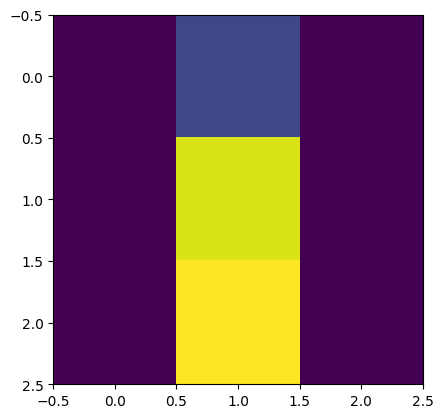

In [498]:
plt.imshow(rotate_180(deepcopy(original_image)))

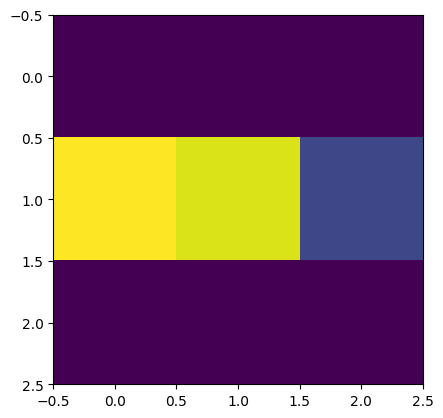

In [499]:
plt.imshow(rotate_270(deepcopy(original_image)))

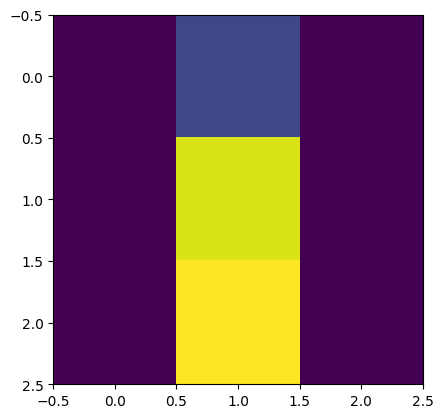

In [500]:
data_w_sym = make_mock_tracks(1,1,3,True)
plt.imshow(data_w_sym[0].reshape(3,3))

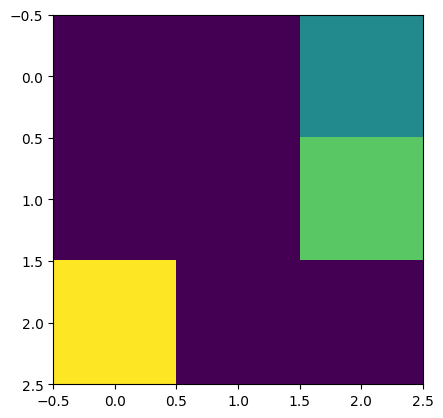

In [501]:
mock_shower = make_mock_showers(1,1,3)[0].reshape(3,3)

plt.imshow(mock_shower)

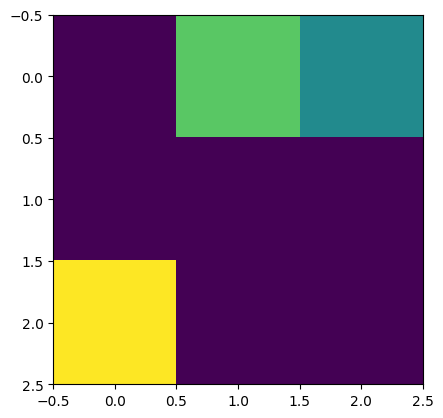

In [502]:
mock_shower_w_sym = make_mock_showers(1,1,3, True)[0].reshape(3,3)

plt.imshow(mock_shower_w_sym)

In [503]:
import numpy as np
np.array([[1,2,3],[1,2,3],[1,2,3]]).reshape(3*3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])

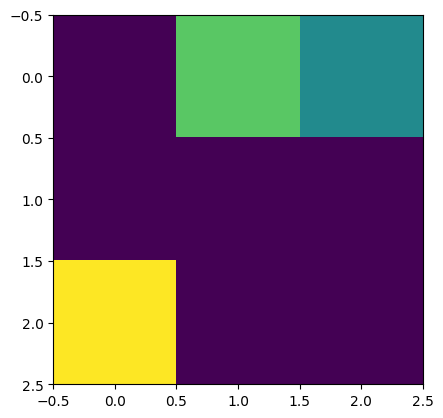

In [504]:
plt.imshow(rotate_90(deepcopy(mock_shower)))

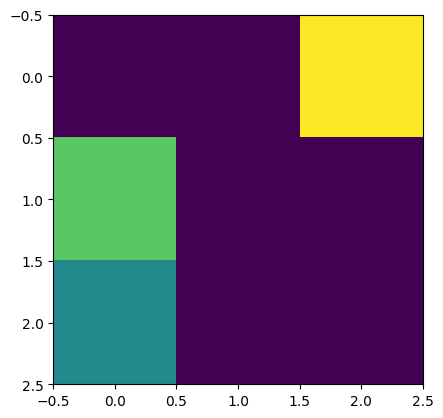

In [505]:
plt.imshow(rotate_180(deepcopy(mock_shower)))

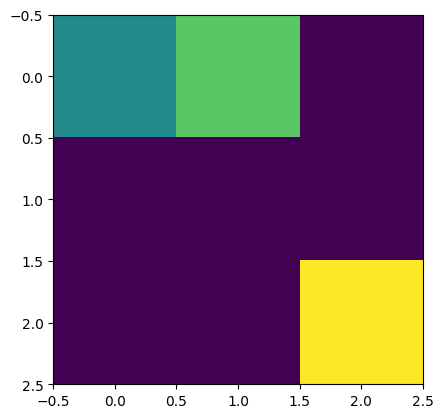

In [506]:
plt.imshow(rotate_270(deepcopy(mock_shower)))

In [507]:
from utils import mock_image_dataset

mock_image_dataset(1,1,3)

,data,label
0,"[0.0, 0.702771433123132, 0.44911966704580664, ...",1
1,"[0.0, 0.21531200313642107, 0.0, 0.0, 0.9393016...",0


In [508]:
from utils import SymmetricDataset

data = SymmetricDataset(100, 3)

In [509]:
data[0]

(tensor([0.        , 0.        , 0.        , 0.93670198, 0.67573494,
         0.67230832, 0.        , 0.        , 0.        ], requires_grad=True),
 0)

In [510]:
data = SymmetricDataset(10,3)

In [511]:
data[0][1]

1

In [512]:
import numpy as np
empty = np.empty(0)
empty

array([], dtype=float64)

In [513]:
import pennylane as qml
@qml.qnode(device = qml.device('default.qubit'), wires = 2)
def check_paulis():
    qml.PauliY(0)@qml.PauliY(1)
    return qml.expval(qml.Z(0))

/Users/marcinjastrzebski/opt/anaconda3/envs/3rdyrenv_new/lib/python3.12/site-packages/pennylane/workflow/qnode.py:494: UserWarning: Received gradient_kwarg wires, which is not included in the list of standard qnode gradient kwargs.
  warnings.warn(


In [514]:
check_paulis()

tensor(-1., requires_grad=True)

In [515]:
qml.draw(check_paulis)()

'0: ─╭Y@Y─┤  <Z>\n1: ─╰Y@Y─┤     '

(<Figure size 400x300 with 1 Axes>, <Axes: >)

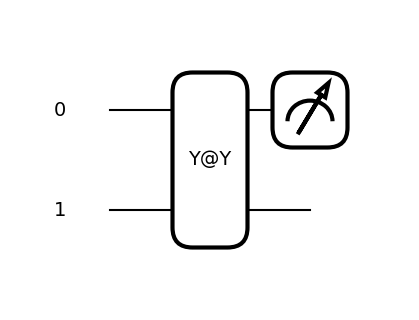

In [516]:
qml.draw_mpl(check_paulis)()

In [517]:
(qml.PauliY(0)@qml.PauliY(1)).matrix()

array([[ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [-1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

In [518]:
(qml.PauliZ(0)@qml.PauliZ(4)).matrix()

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

In [519]:
swap_01 = qml.SWAP(wires = [0,1]).matrix()
swap_23 = qml.SWAP(wires = [2,3]).matrix()

qml.math.kron(swap_01, qml.I(1).matrix())

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [520]:
set(range(4))

{0, 1, 2, 3}

In [521]:
import pennylane as qml

i = qml.I(wires=[0,1,2,3]).matrix()
sw_01 = qml.math.kron(qml.SWAP(wires=[0,1]).matrix(),qml.I(wires=[0,1]).matrix())
sw_12 = qml.SWAP(wires=[1,2]).matrix()

In [522]:
ops = []
ops.append(qml.SWAP(wires = [0,1]))
ops.append(qml.SWAP(wires = [1,2]))

In [523]:
sw_01

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [524]:
(1,2,3,4,5)[::-1]

(5, 4, 3, 2, 1)

In [525]:
@qml.qnode(qml.device('default.qubit', wires=4))
def circuit():
    qml.Hadamard(0)
    qml.prod(qml.SWAP(wires = (1,3)), qml.SWAP(wires = (0,1)))
    return qml.expval(qml.Z(3))


(<Figure size 500x400 with 1 Axes>, <Axes: >)

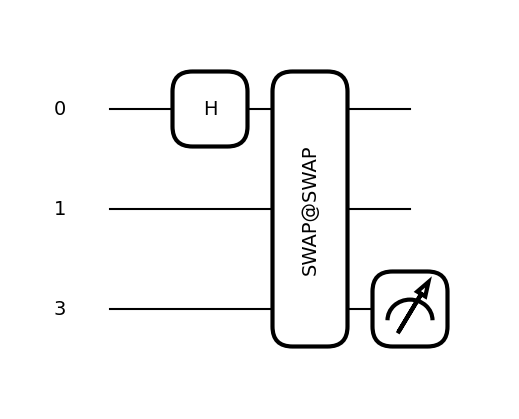

In [526]:
qml.draw_mpl(circuit)()

In [527]:
circuit()

tensor(0., requires_grad=True)

In [528]:
rot_90 = ((0, 1), (0, 3), (0, 2))

qml.prod(qml.SWAP(wires=(0,1)),qml.SWAP(wires=(0,3)), qml.SWAP(wires=(0,2)))

SWAP(wires=[0, 1]) @ SWAP(wires=[0, 3]) @ SWAP(wires=[0, 2])

In [529]:
qml.prod(*[qml.SWAP(wires = indexes) for indexes in rot_90])

SWAP(wires=[0, 1]) @ SWAP(wires=[0, 3]) @ SWAP(wires=[0, 2])

In [530]:
from src.twirling import c4_on_4_qubits
import pennylane as qml

twirl_contributions = []
my_ansatz = qml.RZ(0.1,0)
for group_action in c4_on_4_qubits():
    twirl_contributions.append(qml.prod(group_action, my_ansatz.generator()))


In [531]:
twirl_contributions

[I(0) @ (-0.5 * Z(0)),
 (SWAP(wires=[0, 2]) @ SWAP(wires=[0, 3]) @ SWAP(wires=[0, 1])) @ (-0.5 * Z(0)),
 (SWAP(wires=[0, 3]) @ SWAP(wires=[1, 2])) @ (-0.5 * Z(0)),
 (SWAP(wires=[0, 1]) @ SWAP(wires=[0, 3]) @ SWAP(wires=[0, 2])) @ (-0.5 * Z(0))]

In [532]:
sum_contributions = qml.sum(*twirl_contributions)
sum_contributions

(
    I(0) @ (-0.5 * Z(0))
  + (SWAP(wires=[0, 2]) @ SWAP(wires=[0, 3]) @ SWAP(wires=[0, 1])) @ (-0.5 * Z(0))
  + (SWAP(wires=[0, 3]) @ SWAP(wires=[1, 2])) @ (-0.5 * Z(0))
  + (SWAP(wires=[0, 1]) @ SWAP(wires=[0, 3]) @ SWAP(wires=[0, 2])) @ (-0.5 * Z(0))
)

In [533]:
twirled_op = qml.s_prod(1/4,sum_contributions)


In [534]:
twirled_op.matrix()

array([[-0.5  +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j],
       [ 0.   +0.j, -0.125+0.j, -0.125+0.j,  0.   +0.j, -0.125+0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.125+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j],
       [ 0.   +0.j, -0.125+0.j, -0.125+0.j,  0.   +0.j, -0.125+0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.125+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j, -0.125+0.j,  0.   +0.j,
        -0.125+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.125+0.j,  0.   +0.j,  0.125+0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j],
       [ 0.   +0.j, -0.125+0.j, -0.125+0.j,  0.   +0.j, -0.125+0.j,
         0.   +0.j,  0.   +0.j, 

In [535]:
twirled_gate = qml.exp(op=twirled_op, coeff = 1j*my_ansatz.parameters[0])

In [536]:
twirled_gate.has_matrix

True

In [537]:
my_op = qml.prod(qml.SWAP(wires = [0,1]), qml.SWAP(wires = [2,3]))
@qml.qnode(qml.device('default.qubit', wires=4))
def check_behaviour():
    my_op.decomposition()
    return qml.expval(qml.Z(3))

(<Figure size 400x500 with 1 Axes>, <Axes: >)

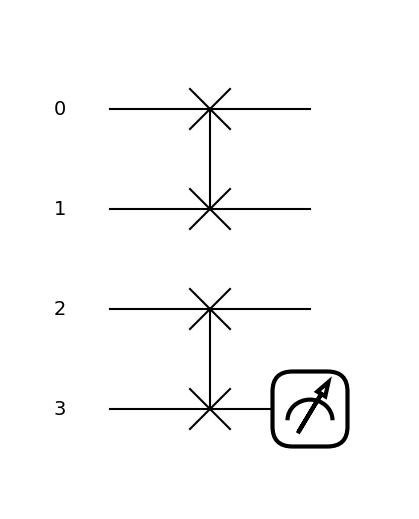

In [538]:
qml.draw_mpl(check_behaviour)()

In [539]:
@qml.qnode(qml.device('default.qubit', wires=4))
def check_behaviour():
    with qml.queuing.AnnotatedQueue() as q:
        my_op = qml.prod(qml.SWAP(wires = [0,1]), qml.SWAP(wires = [2,3]))
    my_op.decomposition()
    return qml.expval(qml.Z(3))

(<Figure size 400x500 with 1 Axes>, <Axes: >)

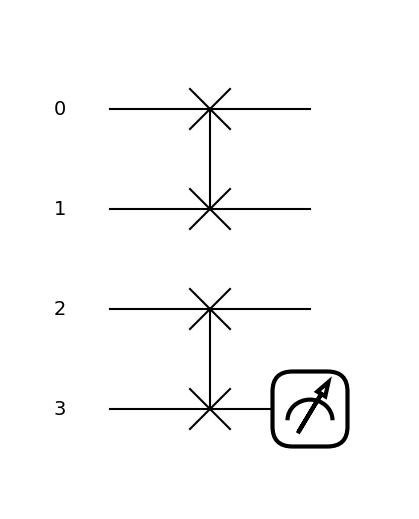

In [540]:
qml.draw_mpl(check_behaviour)()

In [541]:
from src.geometric_classifier import GeometricClassifierAutotwirlJax
from utils import SymmetricDataset
from pennylane import numpy as qnp
circuit_properties = {'n_layers':1}
N_data = 2
image_size = 2
some_params = qnp.random.uniform(0,1,(1,8))
simple_params = qnp.random.uniform(0,1,(1,1,4))
data = [0.1,0.2,0.3,0.4]

In [542]:
geo_class = GeometricClassifierAutotwirlJax('RXEmbedding', 'SimpleAnsatz1',4, False)
geo_class.prediction_circuit(qnp.array(some_params),data,circuit_properties)

Array(-0.17925185, dtype=float32)

In [543]:

qml.draw(geo_class.prediction_circuit)(qnp.array(some_params),data,circuit_properties)

''

In [544]:
from src.twirling import some_simple_group
auto_twirled_model = GeometricClassifierAutotwirlJax('RXEmbedding', 'SimpleAnsatz0', 4, True, some_simple_group)

In [545]:
params_for_compare = qnp.random.rand(1,2)
ansatz_untwirled = auto_twirled_model.ansatz.compute_decomposition(params_for_compare, wires = [0,1],**circuit_properties)
ansatz_untwirled

[RY(tensor(0.15097718, requires_grad=True), wires=[0]),
 RY(tensor(0.71932515, requires_grad=True), wires=[1])]

In [546]:
ansatz_untwirled[0].parameters[0], ansatz_untwirled[1].parameters[0]

(tensor(0.15097718, requires_grad=True),
 tensor(0.71932515, requires_grad=True))

In [547]:
from src.twirling import some_simple_group, twirl_an_ansatz
auto_twirled = twirl_an_ansatz(ansatz_untwirled, some_simple_group())
auto_twirled[0]

QubitUnitary(Array([[ 0.998576  +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.03770846+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.03770846+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.00142396+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.998576  +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.03770846+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.03770846+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.00142396+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.998576  +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.03770846+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.03770846+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.00142396+0.j,
         0.        +0.j],
       [ 0.        +0.j,

In [548]:
auto_twirled[1]

QubitUnitary(Array([[ 0.9680078 +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.17597923+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.17597923+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.03199219+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.9680078 +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.17597923+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.17597923+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.03199219+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.9680078 +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.17597923+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.17597923+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.03199219+0.j,
         0.        +0.j],
       [ 0.        +0.j,

In [549]:
param = ansatz_untwirled[0].parameters[0]
gate = ansatz_untwirled[0].generator()
gate, param

(-0.5 * Y(0), tensor(0.15097718, requires_grad=True))

In [550]:
expop = qml.exp(op=gate, coeff = 1j*param)
expop

Exp(0.15097717932566201j -0.5 * Y(0))

In [551]:
qml.is_unitary(expop)

True

In [552]:
import scipy.linalg
from src.twirling import twirl
twirled_generator = twirl(gate, some_simple_group())
expop_twirled = qml.exp(twirled_generator, coeff=qnp.tensor(1j)*param)
expop_twirled_np = qml.exp(twirled_generator, coeff=1j*np.array(param))
qml.is_unitary(expop_twirled), qml.is_unitary(expop_twirled_np)


(False, True)

In [553]:
qml.math.allclose(expop_twirled.matrix(), expop_twirled_np.matrix())

False

In [554]:
expop_twirled_np.matrix()

array([[ 0.99857604+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.03770846+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.03770846+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.00142396+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.99857604+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.03770846+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.03770846+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.00142396+0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.99857604+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.03770846+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.03770846+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.00142396+0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +

In [555]:
expop_twirled.matrix()

tensor([[ 5.51488280e-01+1.36772359e-03j,
          5.11840177e-02+5.58654830e-02j,
         -1.21115031e-03+8.99172205e-04j,
         -5.50570811e-02-3.49502680e-02j,
         -2.58016789e-02+1.80360083e-02j,
         -1.73057197e-02+1.22943189e-01j,
          1.33357947e-02+1.85265845e-02j,
          3.79788860e-02+2.26633705e-02j,
         -5.46492791e-02+1.81316988e-02j,
          1.98127750e-02+1.40592075e-01j,
         -1.14880701e-02-1.46579155e-02j,
         -2.56738393e-02-4.94921181e-02j,
         -5.12223243e-01-1.36772359e-03j,
         -4.21114459e-02+4.57951394e-02j,
          1.21115031e-03-8.99172205e-04j,
         -3.46214799e-02-1.42465360e-02j],
        [ 5.04648442e-02-3.59897916e-02j,
          6.97819845e-01-4.69913424e-04j,
          9.17679635e-03-7.05617825e-04j,
         -2.46112464e-01+8.10096135e-03j,
          2.77662635e-02-1.23373163e-02j,
         -7.76824424e-02+3.69748626e-02j,
          6.85653636e-02-3.32014245e-05j,
          9.93460770e-02-1.753759

In [556]:
1j*param

tensor(0.+0.15097718j, requires_grad=True)

In [557]:
1j*np.array(param)

0.15097717932566201j

In [558]:
with_linalg = scipy.linalg.expm(1.0j*param*twirled_generator.matrix())
good_twirled = qml.QubitUnitary(with_linalg, wires = [0,1,2,3])

In [559]:
qml.math.allclose(good_twirled.matrix(), expop_twirled_np.matrix())

True

In [560]:
good_twirled.matrix()[0]

array([ 0.99857604+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.03770846+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.03770846+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.00142396+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j])

In [561]:
expop_twirled_np.matrix()[0]

array([ 0.99857604+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.03770846+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
       -0.03770846+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,
        0.00142396+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j])

In [562]:
qml.is_unitary(good_twirled)

True

In [563]:
op = qml.Z(wires = [0])
group_actions = some_simple_group(2)
automatic = twirl(op, group_actions).matrix()
manual = qnp.array([[1,0,0,0],
                     [0,0,0,0],
                     [0,0,0,0],
                     [0,0,0,-1]])

In [564]:
qml.math.allclose(manual, automatic,rtol = 1e-05, atol = 1e-08)

True

In [565]:
import pandas as pd
np.load('/Users/marcinjastrzebski/Desktop/ACADEMIA/THIRD_YEAR/Geometric_classifier/models_save_dir/geometric/train_loss_intervlas.npy')

array([[0, 1, 2, 3, 4, 5]])

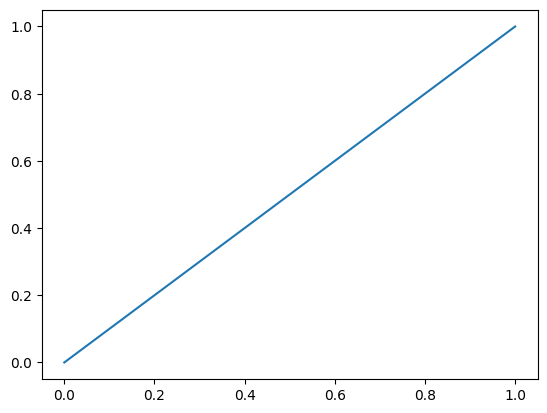

In [566]:
fig, ax = plt.subplots(1,1)

ax.plot([0,1],[0,1])

In [567]:
qnp.concatenate([qnp.array([0]), qnp.array([0])])

tensor([0, 0], requires_grad=True)

In [568]:
random_params = qnp.random.uniform(0,1,(1,2))
qnp.concatenate([random_params,qnp.array([[0,0]])], axis=1)

tensor([[0.55201491, 0.44067487, 0.        , 0.        ]], requires_grad=True)

In [569]:
swap = qml.SWAP(wires=[0,1])
z0 = qml.Z(wires=0)@qml.I(wires=1)
y0 = qml.Y(wires=0)@qml.I(wires=1)
x0 = qml.X(wires=0)@qml.I(wires=1)
swap.matrix(), z0.matrix(), y0.matrix(), x0.matrix()

(array([[1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]]),
 array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
        [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]]),
 array([[0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.-1.j],
        [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+1.j, 0.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]]))

In [570]:
qml.math.matmul(swap.matrix(), z0.matrix())

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [571]:
qml.math.matmul(z0.matrix(), swap.matrix())

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j]])

In [572]:
np.load('/Users/marcinjastrzebski/Desktop/ACADEMIA/THIRD_YEAR/Geometric_classifier/models_save_dir/standard/train_losses.npy')

array([[0.83264458, 0.72985506, 0.75219727, 0.91196948, 0.64640903,
        0.7792238 ]])

In [573]:
import itertools
embeddings = ['a', 'b']
ansatze = ['A', 'B']

for one, two in itertools.product(embeddings, ansatze):
    print(one,two)

a A
a B
b A
b B


In [574]:
from src.ansatze import SimpleAnsatz1
params = np.random.uniform(0,1,(1,8))
config = {'n_layers':1}
@qml.qnode(device=qml.device('default.qubit'))
def ans1():
    SimpleAnsatz1.compute_decomposition(*[params], wires = [0,1,2,3], **config)
    return qml.expval(qml.Z(0))

(<Figure size 1500x500 with 1 Axes>, <Axes: >)

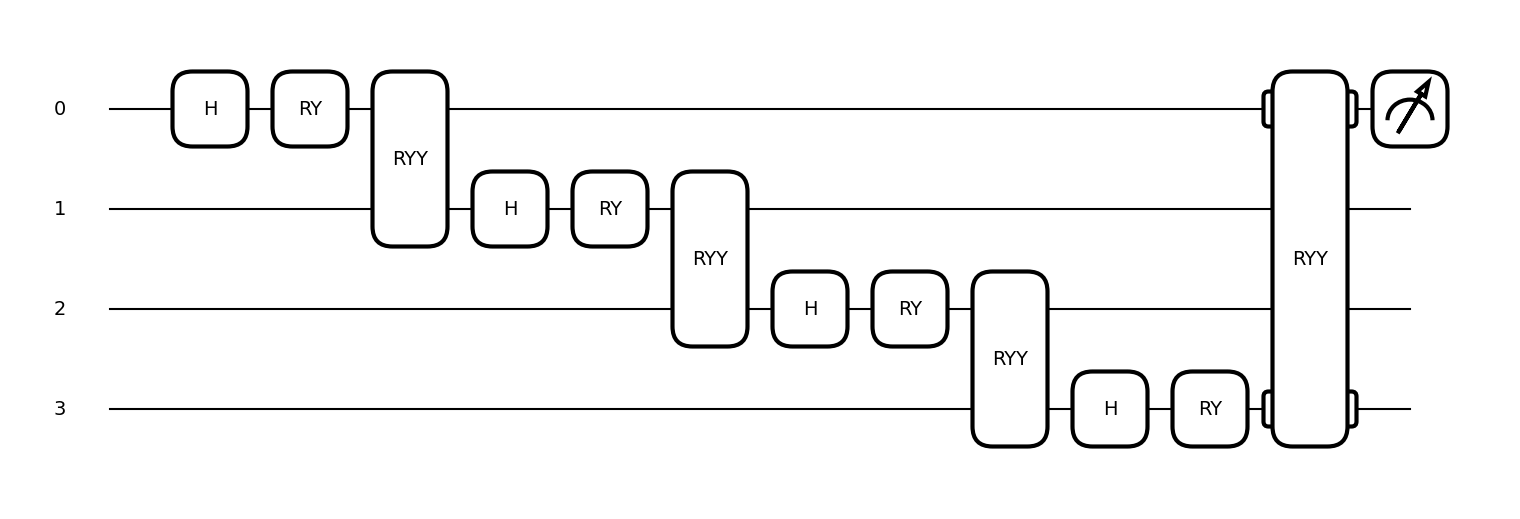

In [575]:
qml.draw_mpl(ans1)()

In [576]:
ans1()

tensor(-0.51123311, requires_grad=True)

In [577]:
from jax import numpy as jnp
def sigmoid_activation(score):
    return 1/(1+jnp.exp(-score))

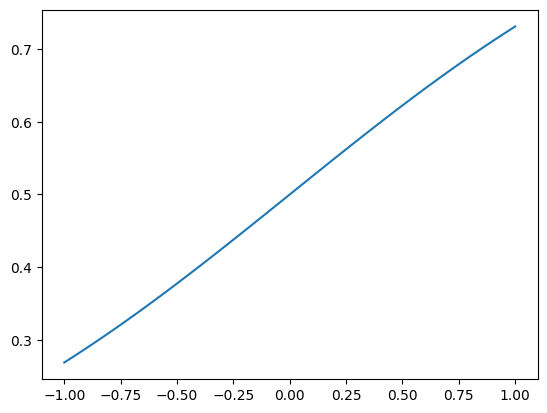

In [578]:
x = np.linspace(-1,1,100)
y = [sigmoid_activation(i) for i in x]
plt.plot(x, y)

In [579]:
y

[Array(0.26894143, dtype=float32),
 Array(0.27293187, dtype=float32),
 Array(0.2769591, dtype=float32),
 Array(0.2810228, dtype=float32),
 Array(0.28512257, dtype=float32),
 Array(0.28925812, dtype=float32),
 Array(0.29342902, dtype=float32),
 Array(0.2976349, dtype=float32),
 Array(0.30187526, dtype=float32),
 Array(0.30614975, dtype=float32),
 Array(0.31045783, dtype=float32),
 Array(0.314799, dtype=float32),
 Array(0.31917283, dtype=float32),
 Array(0.32357872, dtype=float32),
 Array(0.3280161, dtype=float32),
 Array(0.33248442, dtype=float32),
 Array(0.3369831, dtype=float32),
 Array(0.34151152, dtype=float32),
 Array(0.34606904, dtype=float32),
 Array(0.3506549, dtype=float32),
 Array(0.3552686, dtype=float32),
 Array(0.3599094, dtype=float32),
 Array(0.36457646, dtype=float32),
 Array(0.3692691, dtype=float32),
 Array(0.3739867, dtype=float32),
 Array(0.37872827, dtype=float32),
 Array(0.38349319, dtype=float32),
 Array(0.3882806, dtype=float32),
 Array(0.39308962, dtype=float32)

In [580]:
np.array([[0,1],[0,1]]).flatten()

array([0, 1, 0, 1])

In [581]:
np.array([[0,0],[1,1]]).flatten()

array([0, 0, 1, 1])

In [582]:
import dill
with open('/Users/marcinjastrzebski/Desktop/ACADEMIA/THIRD_YEAR/Geometric_classifier/models_save_dir/geometric/model.pkl', 'rb') as file:
    prediction_circ = dill.load(file)
with open('/Users/marcinjastrzebski/Desktop/ACADEMIA/THIRD_YEAR/Geometric_classifier/models_save_dir/geometric/params.pkl', 'rb') as file:
    params = dill.load(file)
with open('/Users/marcinjastrzebski/Desktop/ACADEMIA/THIRD_YEAR/Geometric_classifier/models_save_dir/geometric/info.pkl', 'rb') as file:
    info = dill.load(file)
prediction_circ, params, info

(<bound method GeometricClassifierJax.prediction_circuit of <src.geometric_classifier.GeometricClassifierJax object at 0x1d2075820>>,
 Array([[0.53089845, 0.83420134, 0.11399101, 0.4162092 , 0.14675589,
         0.09233859, 0.18626021, 0.34556073],
        [0.5106439 , 0.6526935 , 0.5330709 , 0.7990963 , 0.20445225,
         0.87811744, 0.02738759, 0.6704675 ]], dtype=float32),
 {})

In [583]:
some_features = np.random.uniform(0,1,(4))
sigmoid_activation(prediction_circ(params, some_features, {'n_layers':2}))

Array(0.60387945, dtype=float32)

In [584]:
track = np.array([0,0,0.1,0.1])
sigmoid_activation(prediction_circ(params, track, {'n_layers':2}))

Array(0.6118451, dtype=float32)

In [585]:
from utils import SymmetricDatasetJax
test_data = SymmetricDatasetJax(300,2)[:60]
test_data[1]

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [586]:
preds = []
for point, label in zip(test_data[0], test_data[1]):
    preds.append(sigmoid_activation(prediction_circ(params, point, {'n_layers':2})))

In [587]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(test_data[1], preds, drop_intermediate=False)

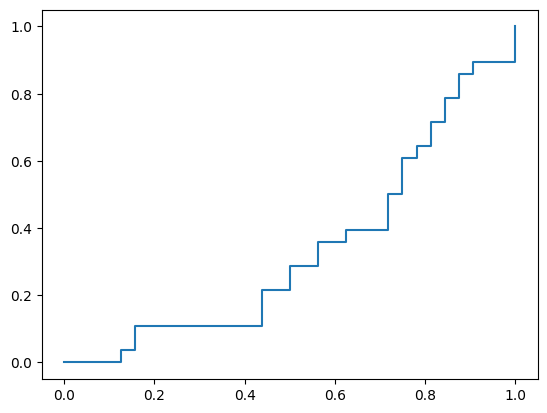

In [588]:
plt.plot(fpr, tpr)


In [589]:
len(fpr)

61

In [590]:
fpr


array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.125  , 0.15625,
       0.15625, 0.15625, 0.1875 , 0.21875, 0.25   , 0.28125, 0.3125 ,
       0.34375, 0.375  , 0.40625, 0.4375 , 0.4375 , 0.4375 , 0.4375 ,
       0.46875, 0.5    , 0.5    , 0.5    , 0.53125, 0.5625 , 0.5625 ,
       0.5625 , 0.59375, 0.625  , 0.625  , 0.65625, 0.6875 , 0.71875,
       0.71875, 0.71875, 0.71875, 0.75   , 0.75   , 0.75   , 0.75   ,
       0.78125, 0.78125, 0.8125 , 0.8125 , 0.8125 , 0.84375, 0.84375,
       0.84375, 0.875  , 0.875  , 0.875  , 0.90625, 0.90625, 0.9375 ,
       0.96875, 1.     , 1.     , 1.     , 1.     ])

In [591]:
tpr


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03571429, 0.03571429, 0.07142857, 0.10714286, 0.10714286,
       0.10714286, 0.10714286, 0.10714286, 0.10714286, 0.10714286,
       0.10714286, 0.10714286, 0.10714286, 0.14285714, 0.17857143,
       0.21428571, 0.21428571, 0.21428571, 0.25      , 0.28571429,
       0.28571429, 0.28571429, 0.32142857, 0.35714286, 0.35714286,
       0.35714286, 0.39285714, 0.39285714, 0.39285714, 0.39285714,
       0.42857143, 0.46428571, 0.5       , 0.5       , 0.53571429,
       0.57142857, 0.60714286, 0.60714286, 0.64285714, 0.64285714,
       0.67857143, 0.71428571, 0.71428571, 0.75      , 0.78571429,
       0.78571429, 0.82142857, 0.85714286, 0.85714286, 0.89285714,
       0.89285714, 0.89285714, 0.89285714, 0.92857143, 0.96428571,
       1.        ])

In [592]:
_

array([       inf, 0.61144495, 0.6114376 , 0.6112664 , 0.6111937 ,
       0.611171  , 0.61109644, 0.6109665 , 0.61072606, 0.61047167,
       0.61012256, 0.61003304, 0.60988104, 0.6097211 , 0.6094368 ,
       0.60942394, 0.6093785 , 0.60932714, 0.6091269 , 0.6090466 ,
       0.6084989 , 0.6084597 , 0.6082695 , 0.6080174 , 0.6077693 ,
       0.60757625, 0.6075206 , 0.6074487 , 0.6073422 , 0.60716665,
       0.6071287 , 0.6070981 , 0.6070969 , 0.6070964 , 0.6070772 ,
       0.6069276 , 0.6068719 , 0.6067523 , 0.60618466, 0.6060247 ,
       0.60597795, 0.60589945, 0.6052833 , 0.6047933 , 0.6043331 ,
       0.6041835 , 0.60357195, 0.60320586, 0.6025754 , 0.6024942 ,
       0.60234183, 0.6022974 , 0.60208   , 0.6018368 , 0.60168   ,
       0.60153836, 0.6015248 , 0.59984636, 0.5990345 , 0.59415436,
       0.5936052 ], dtype=float32)

In [593]:
type(format(0.84343434344, '.3f'))

str

In [594]:
from utils import SymmetricDatasetJax
from jax_dataloader import Dataset
data = SymmetricDatasetJax(50, 2)
train_size = 40
validation_size = 10
train_ids, val_ids = data.split(train_size, validation_size)
            
val_data = data[val_ids]
train_data = data[train_ids]

In [595]:
val_data

(Array([[0.2608813 , 0.75104505, 0.        , 0.        ],
        [0.        , 0.7877441 , 0.        , 0.9449235 ],
        [0.        , 0.6083408 , 0.        , 0.8501941 ],
        [0.        , 0.        , 0.4887173 , 0.39985085],
        [0.        , 0.5605592 , 0.        , 0.7242295 ],
        [0.8259817 , 0.        , 0.78706414, 0.        ],
        [0.        , 0.66659766, 0.98630816, 0.678532  ],
        [0.        , 0.6678363 , 0.        , 0.4926975 ],
        [0.        , 0.6047583 , 0.8276468 , 0.        ],
        [0.        , 0.        , 0.16384856, 0.3899177 ]], dtype=float32),
 array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1]))

In [596]:
train_ids

array([72, 17, 88, 35, 96, 60, 85, 24, 41, 97, 37, 49, 23, 89, 19, 42, 83,
       29, 16, 56,  5, 48,  2, 10, 47, 91,  9, 71, 76, 86, 94, 27, 79, 77,
       43, 39, 46,  8, 90, 55])

In [597]:
import jax_dataloader as jdl

train_data_jdl = jdl.ArrayDataset(*train_data)

In [598]:
import itertools

options = ['X', 'Y', 'Z']
combinations = itertools.combinations_with_replacement(options, r = 2)

In [599]:
for i in combinations:
    print(i[0]+i[1])

XX
XY
XZ
YY
YZ
ZZ


In [600]:
c4_on_4_qubits()

[I(0),
 SWAP(wires=[0, 2]) @ SWAP(wires=[0, 3]) @ SWAP(wires=[0, 1]),
 SWAP(wires=[0, 3]) @ SWAP(wires=[1, 2]),
 SWAP(wires=[0, 1]) @ SWAP(wires=[0, 3]) @ SWAP(wires=[0, 2])]

In [601]:
m1 = qml.prod(*[qml.SWAP(wires=[0,2]), qml.SWAP(wires=[0,3]), qml.SWAP(wires=[0,1])])
m2 = qml.prod(*[qml.SWAP(wires=[0,1]), qml.SWAP(wires=[0,3]), qml.SWAP(wires=[0,2])])
qml.math.allclose(m1.matrix(wire_order = [0,1,2,3]),m2.matrix(wire_order = [0,1,2,3]))

False

In [602]:
@qml.qnode(qml.device('default.qubit', wires=4))
def check_swaps(which = 'm1'):
    qml.Hadamard(wires=[1])
    if which == 'm1':
        qml.prod(*[qml.SWAP(wires=[0,2]), qml.SWAP(wires=[0,3]), qml.SWAP(wires=[0,1])])
    elif which =='m2':
        qml.prod(*[qml.SWAP(wires=[0,1]), qml.SWAP(wires=[0,3]), qml.SWAP(wires=[0,2])])
    else:
        pass
    return qml.expval(qml.PauliZ(0))
    

(<Figure size 500x500 with 1 Axes>, <Axes: >)

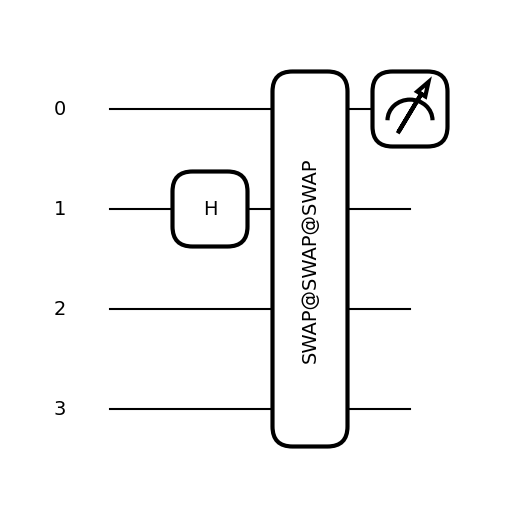

In [603]:
qml.draw_mpl(check_swaps)('m1')

In [604]:
check_swaps('m1')

tensor(1., requires_grad=True)

In [605]:
check_swaps('m2')

tensor(0., requires_grad=True)

In [608]:
m2

SWAP(wires=[0, 1]) @ SWAP(wires=[0, 3]) @ SWAP(wires=[0, 2])

In [612]:
inv_meas = (qml.Z(0)@qml.Z(1)@qml.Z(2)@qml.Z(3)).matrix()

In [617]:
(inv_meas@m2.matrix() - m2.matrix()@inv_meas).real

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [619]:
(inv_meas@m2.matrix() - m2.matrix()@inv_meas).imag


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [14]:
import itertools
options = ['a','b','c']
for combo in itertools.product(options, repeat=3):
    print(combo)

('a', 'a', 'a')
('a', 'a', 'b')
('a', 'a', 'c')
('a', 'b', 'a')
('a', 'b', 'b')
('a', 'b', 'c')
('a', 'c', 'a')
('a', 'c', 'b')
('a', 'c', 'c')
('b', 'a', 'a')
('b', 'a', 'b')
('b', 'a', 'c')
('b', 'b', 'a')
('b', 'b', 'b')
('b', 'b', 'c')
('b', 'c', 'a')
('b', 'c', 'b')
('b', 'c', 'c')
('c', 'a', 'a')
('c', 'a', 'b')
('c', 'a', 'c')
('c', 'b', 'a')
('c', 'b', 'b')
('c', 'b', 'c')
('c', 'c', 'a')
('c', 'c', 'b')
('c', 'c', 'c')


In [30]:
a_list = []
for i in range(4):
    a_list += [[[0], [0]]]
    print(np.shape(a_list))

(1, 2, 1)
(2, 2, 1)
(3, 2, 1)
(4, 2, 1)


In [31]:
a_list = np.array(a_list)
np.shape(a_list)

(4, 2, 1)

In [32]:
a_list

array([[[0],
        [0]],

       [[0],
        [0]],

       [[0],
        [0]],

       [[0],
        [0]]])

In [35]:
import numpy as np
#this would be like going over one feature map with one kernel for two points
outputs = np.concatenate(a_list, axis = 1)
outputs

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

In [37]:
np.reshape(outputs[0], (2,2,1))

array([[[0],
        [0]],

       [[0],
        [0]]])

In [41]:
first_output_from_one_channel = np.random.random((2,2))
second_ouput_from_one_channel = np.random.random((2,2))

In [45]:
output_channels = [first_output_from_one_channel, second_ouput_from_one_channel]
output_channels

[array([[0.44067623, 0.69172682],
        [0.1627989 , 0.80372555]]),
 array([[0.71602683, 0.00500258],
        [0.34047024, 0.60596572]])]

In [44]:
np.add.reduce(output_channels)

array([[1.15670306, 0.6967294 ],
       [0.50326914, 1.40969126]])

In [103]:
from torchvision.datasets import MNIST
from torchvision.transforms import CenterCrop, Compose
transforms = Compose([CenterCrop(27)])
train_data = MNIST(root='data',
                   train=True,
                   download=False,
                   transform=transforms)

In [104]:
mask = (train_data.targets == 0) | (train_data.targets == 1)

train_data.data = train_data.data[mask]
train_data.targets = train_data.targets[mask]

In [105]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

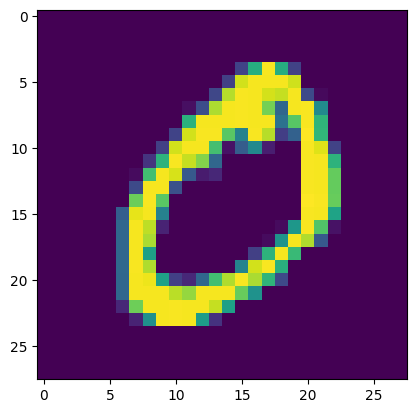

In [106]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0])

In [107]:
train_data.data[0].shape

torch.Size([28, 28])

In [108]:
from torch.utils.data.dataloader import DataLoader
training_loader = DataLoader(
        train_data, batch_size=4, shuffle=True)

In [112]:
training_loader.dataset[0][0]

In [114]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [2]:
import torch

some_data = torch.zeros(10, 1, 4, 9, 9)
unfolded = torch.nn.functional.unfold(some_data.view(10,4,9,9), [3,3], [3,3])

In [3]:
some_data = some_data.view(10,1,4,some_data.shape[3]*some_data.shape[4])

In [4]:
some_data.shape

torch.Size([10, 1, 4, 81])

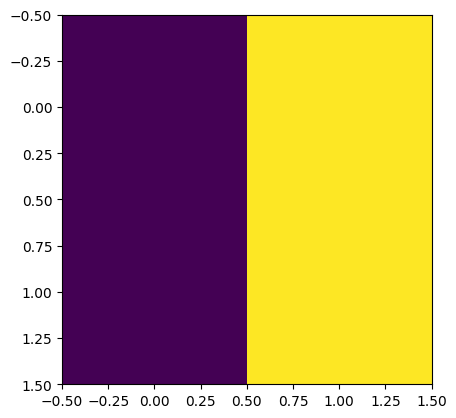

In [5]:
import torchvision
import matplotlib.pyplot as plt
some_image = torch.tensor([[0,1],[0,1]])

plt.imshow(some_image)

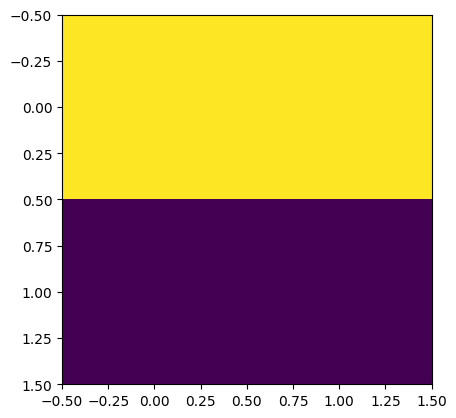

In [6]:
plt.imshow(some_image.rot90())

In [7]:
my_data = torch.tensor([[[0,1],[0,1]],[[0,0],[1,0]]])

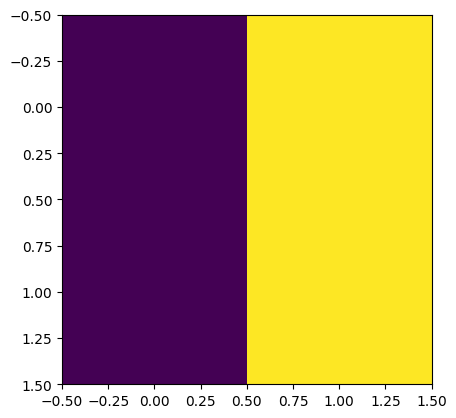

In [8]:
plt.imshow(my_data[0])

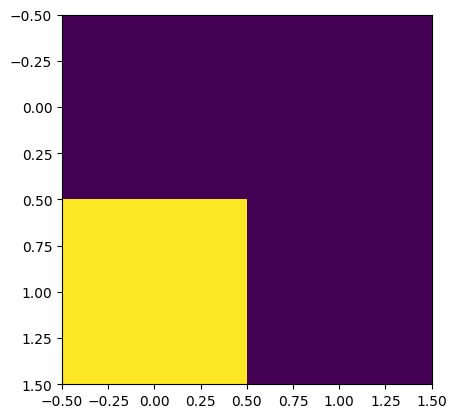

In [9]:
plt.imshow(my_data[1])

In [10]:
my_data.rot90(dims=(1,2))

tensor([[[1, 1],
         [0, 0]],

        [[0, 0],
         [0, 1]]])

In [11]:
my_data.rot90(0, (1,2))

tensor([[[0, 1],
         [0, 1]],

        [[0, 0],
         [1, 0]]])

In [14]:
some_shape = (1,2,3,5)
torch.zeros(2,*some_shape[1:])

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]],


        [[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]],

         [[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])

In [16]:
some_dict = {'a':4}

In [25]:
a = [0,1,2,3,4,5]
a[-2:]

[4, 5]

In [31]:
for i in range(4,1):
    print(i)

In [36]:
range(4)[-1]

3

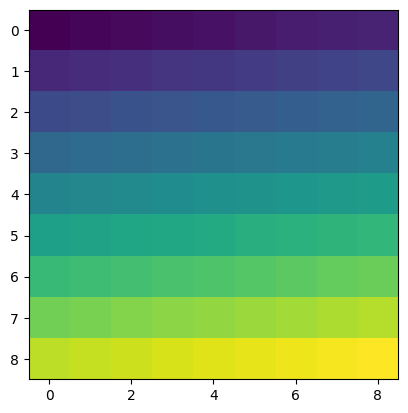

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
data =  torch.tensor(np.array([i for i in range(81)])/81).view(1,1,9,9)
plt.imshow(data[0][0].numpy())

In [ ]:
unfolded = torch.nn.functional.unfold(data, 3,3)
unfolded.shape

In [ ]:
fig, ax = plt.subplots(1,9)
for i in range(9):
    ax[i].imshow(unfolded[0][i].view(3,3), vmin=0,vmax=1)

In [9]:
unfolded_channels_separated = unfolded.view(1,1,9,9)

NameError: name 'unfolded' is not defined

In [10]:
output = torch.zeros(1,1,4,3,3)

In [11]:
filter_output = torch.zeros(1,4,9)

In [12]:
input_to_quanv = unfolded_channels_separated[:,0,:,:]

NameError: name 'unfolded_channels_separated' is not defined

In [13]:
patches_to_convolve = input_to_quanv.permute(0,2,1).reshape(-1, 9)
patches_to_convolve.shape

NameError: name 'input_to_quanv' is not defined

In [14]:
from src.quanvolution import create_structured_patches
structured_patches = create_structured_patches(patches_to_convolve)
structured_patches.shape

NameError: name 'patches_to_convolve' is not defined

NameError: name 'structured_patches' is not defined

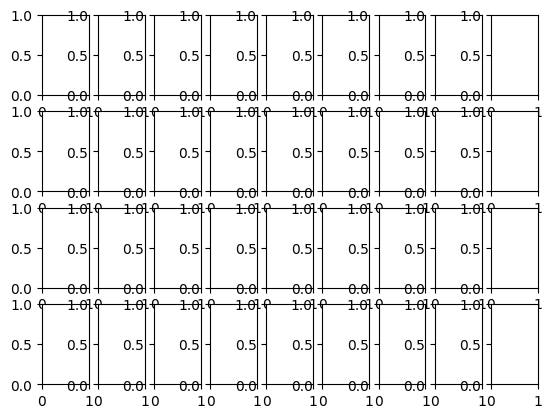

In [15]:
fig, ax = plt.subplots(4,9)
for i in range(4):
    for j in range(9):
        ax[i][j].imshow(structured_patches.view(4,9,3,3)[i][j], vmin=0, vmax= 1)

In [1]:
int(5.1), int(5.0)

(5, 5)

In [5]:
5.0 == int(5.0)
5.1 == int(5.1)

False

In [7]:
import torch
torch.load('/Users/marcinjastrzebski/Desktop/ACADEMIA/THIRD_YEAR/Geometric_classifier/data/microboone_from_callum/val_data.pt').shape


torch.Size([500, 21, 21])

In [9]:
'ansatz_block' == 'ansatz_block'

True

In [1]:
min([0,1,2])

0

In [6]:
import torch
torch.load('/Users/marcinjastrzebski/Desktop/ACADEMIA/THIRD_YEAR/Geometric_classifier/data/microboone_from_callum/val_labels.pt')

tensor([1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
        1., 0., 1., 1., 0., 1., 0., 0., 

In [5]:
import numpy as np
x = np.linspace(-10,10,100)
n = np.arange(1,10)
np.sin(x*n)

ValueError: operands could not be broadcast together with shapes (100,) (9,) 

In [8]:
from pennylane import RX, RY, RZ
import itertools
gate_placement_1local = ['corner', 'side', 'centre']
gate_placement_2local = [
    'side_centre',
    'ring_neighbours_corner',
    'ring_neighbours_side',
    'ring_second_neighbours_corner',
    'ring_second_neighbours_side',
    'ring_third_neighbours_corner',
    'ring_third_neighbours_side',
    'ring_fourth_neighbours_corner',
    'ring_fourth_neighbours_side'
]
single_qubit_pauli = [RX, RY, RZ]
two_qubit_pauli = [combo[0] + combo[1]
                    for combo in itertools.combinations_with_replacement(['X', 'Y', 'Z'], r=2)]

max_gates_per_block = 4
# this finds all combos [X,X,X,X],...,[X,Y,X,Z],...
combos_for_1local_blocks = itertools.product(
    single_qubit_pauli, repeat=max_gates_per_block)
combos_for_2local_blocks = itertools.product(
    two_qubit_pauli, repeat=max_gates_per_block)
# this finds combos like [0,], []
all_1local_placement_combos = [combo for r in range(
    1, max_gates_per_block) for combo in itertools.combinations_with_replacement(gate_placement_1local, r=r)]
all_2local_placement_combos = [combo for r in range(
    1, max_gates_per_block) for combo in itertools.combinations_with_replacement(gate_placement_2local, r=r)]

In [9]:
for combo in all_1local_placement_combos:
    print(combo)

('corner',)
('side',)
('centre',)
('corner', 'corner')
('corner', 'side')
('corner', 'centre')
('side', 'side')
('side', 'centre')
('centre', 'centre')
('corner', 'corner', 'corner')
('corner', 'corner', 'side')
('corner', 'corner', 'centre')
('corner', 'side', 'side')
('corner', 'side', 'centre')
('corner', 'centre', 'centre')
('side', 'side', 'side')
('side', 'side', 'centre')
('side', 'centre', 'centre')
('centre', 'centre', 'centre')


In [11]:
for combo in combos_for_1local_blocks:
    print(combo)

(<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>)
(<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>)
(<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RZ'>)
(<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RY'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>)
(<cl

In [13]:
code = 'EQEC'
code[:2] == 'EQ'

True

In [14]:
some_dict = {'lr':0.1}
some_dict['wa'] = 2

In [15]:
some_dict

{'lr': 0.1, 'wa': 2}

In [16]:
some_dict['aa'] = some_dict['b'] = 0

In [17]:
some_dict

{'lr': 0.1, 'wa': 2, 'aa': 0, 'b': 0}